<a href="https://colab.research.google.com/github/ChrisMath26/Bases_ML/blob/main/Clasificaci%C3%B3n%20B%C3%A1sica/Christian_Trilleras_ejemplos_b%C3%A1sicos_clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

El siguiente conjunto de datos ha sido obtenido por una compañía de seguros de salud. El objetivo es saber cuál será el costo del seguro de salud dados los siguientes atributos

1. Edad
2. Género
3. BMI
4. Numero de Hijos
5. Es fumador o no
6. Región donde vive
    
La última columna es el costo del seguro que se le ha cobrado a cada una de las personas en la base de datos.    
    

## 1. Estadística descriptiva de los datos

Responda las siguientes preguntas

1. Cuántos datos hay en el conjunto de datos
2. Cuál es el promedio del valor del seguro en este conjunto de datos
3. Cuál es el máximo valor de hijos que hay en el conjunto
3. Cuál es la desviación estándar del BMI

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar datos
datos=pd.read_csv('insurance.csv')
datos

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# 1) número de datos en el conjunto de datos
datos.shape

(1338, 7)

In [ ]:
# 2) Promedio del valor del seguro
promedio_seguro = datos["charges"].mean()
print(f" El promedio del valor del seguro es: {promedio_seguro}")

 El promedio del valor del seguro es: 13270.422265141257


In [ ]:
# 3) Cuál es el máximo valor de hijos que hay en el conjunto
max_hijos=datos["children"].max()
print(f'El máximo valor de hijos que hay en el conjunto: {max_hijos}')

El máximo valor de hijos que hay en el conjunto: 5


In [ ]:
# 4) Cuál es la desviación estándar del BMI
std_BMI=datos["bmi"].std()
print(f"La desviación estándar del BMI es de: {std_BMI}")

La desviación estándar del BMI es de: 6.098186911679014


# 2. Inspección gráfica

Usando los métodos estudiados responda:

1. Calcule y grafique la matriz de correlación entre las variables numéricas
2. Discuta las dos correlaciones más significativas en el conjunto de datos. Tienen sentido?
3. Haga un "pairplot" para visualizar la distribución y las relaciones entre los datos donde se observe las diferencias entre fumadores y no fumadores. ¿Qué diferencias significativas encuentra entre las distribuciones de fumadores y no fumadores?
4. Realice un histograma que cuantifique el porcentaje de personas en el conjunto de datos que viven en las distintas regiones. Existe un muestreo preferente por alguna región?

In [ ]:
# 1) Calcule y grafique la matriz de correlación entre las variables numéricas
import seaborn as sns
#creando un nuevo data frame con las variables  númericas
datosnum=pd.DataFrame(datos, columns = ['age',	'bmi',	'children',	'charges'])
correlacion=datosnum.corr()
print(f'La matriz de correlación es: {correlacion}')
# Viualizar la matriz de correlación con Seaborn

La matriz de correlación es:                age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


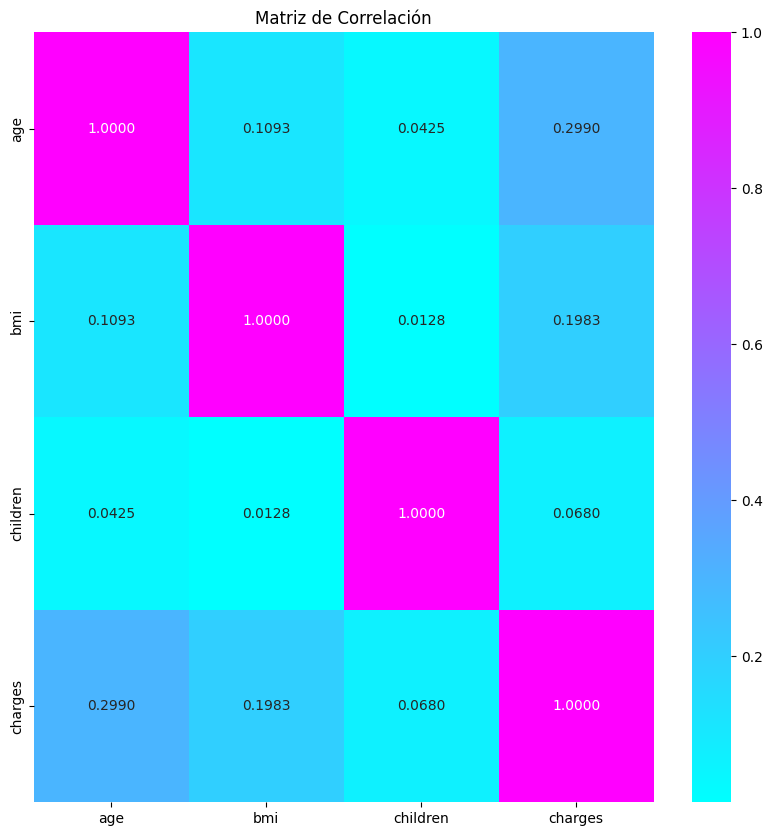

In [ ]:
# Viualizar la matriz de correlación con Seaborn
f, eje_donde_deseo_graficar = plt.subplots(figsize=(10, 10))
sns.heatmap(datosnum.corr(), annot=True, linecolor="black", fmt='.4f', ax=eje_donde_deseo_graficar, cmap="cool")
plt.title("Matriz de Correlación")
plt.show()


2. Discuta las dos correlaciones más significativas en el conjunto de datos. Tienen sentido?

Con base en la matriz de correlación, se observa una estructura de asociación lineal que tiende a ser positiva moderada entre las variables de edad y el costo del seguro cobrado. Esta relación sugiere que, en promedio, a medida que la edad aumenta, también lo hace el costo del seguro. Sin embargo, es esencial subrayar que la correlación no implica causalidad directa, y otros factores, como el historial de salud o el tipo de cobertura, pueden influir en esta asociación. En el contexto de la industria del seguro, la correlación entre edad y costo del seguro podría ser coherente, considerando prácticas comunes de ajuste de primas en función de la edad.


3. Haga un "pairplot" para visualizar la distribución y las relaciones entre los datos donde se observe las diferencias entre fumadores y no fumadores. ¿Qué diferencias significativas encuentra entre las distribuciones de fumadores y no fumadores?

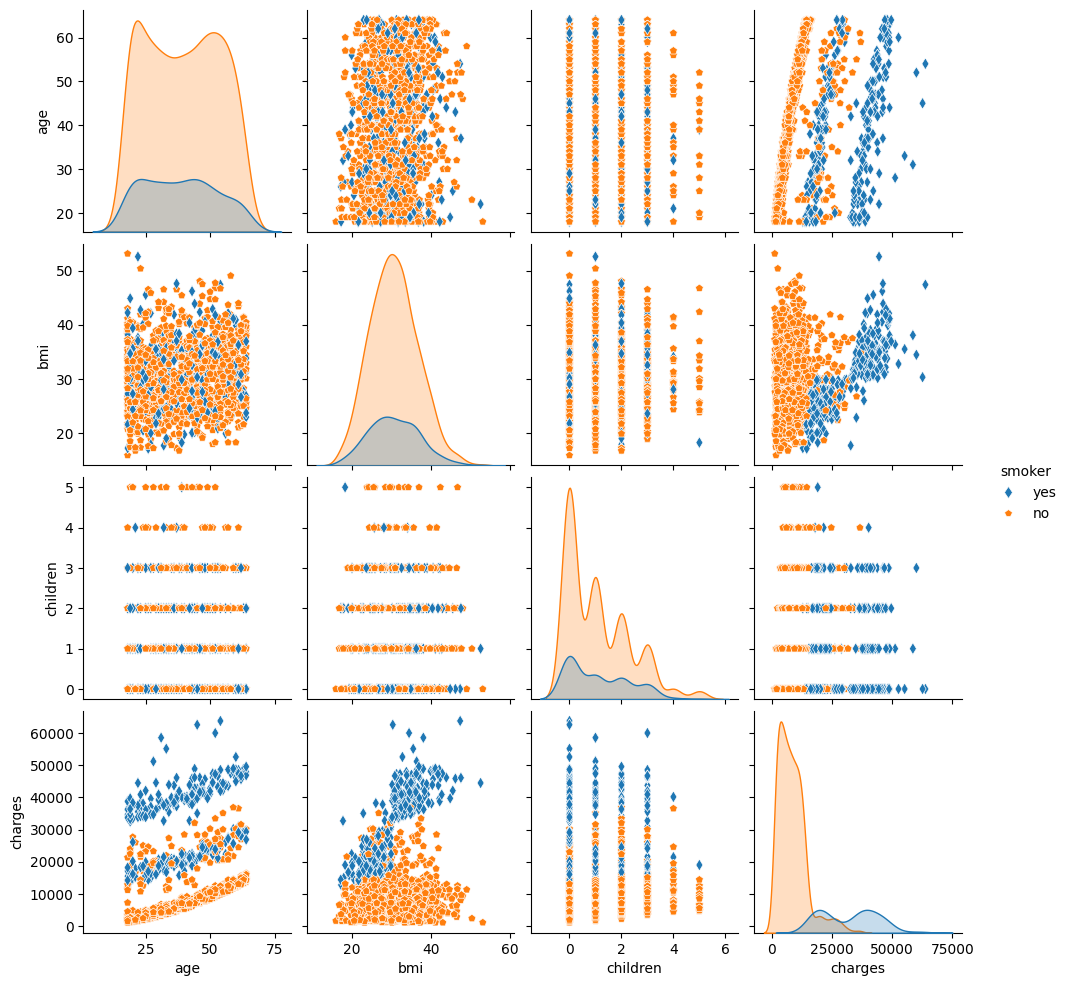

In [ ]:
sns.pairplot(datos, hue="smoker", markers=['d', 'p'])

En el análisis del pairplot, se destacan ciertas tendencias significativas. Por ejemplo, se observa que a medida que la edad aumenta, el costo del seguro también tiende a incrementarse; no obstante, este aumento es más pronunciado en el caso de los individuos fumadores, lo que sugiere que el costo del seguro se ve fuertemente influenciado por el hábito de fumar. Similarmente, al examinar la variable BMI, se nota que las personas con un índice de masa corporal más alto y que fuman tienden a incurrir en mayores costos de seguro. Además, aquellos con un menor número de hijos son más propensos a fumar, y a su vez, este grupo demográfico tiende a pagar más por su seguro de salud.

En resumen, se puede inferir que el hábito de fumar está asociado con pagos de seguro más elevados, mientras que los no fumadores tienden a beneficiarse de precios más asequibles.

<ipython-input-10-02faea2d893e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_regiones.index, y=porcentaje_regiones.values, palette='hsv')


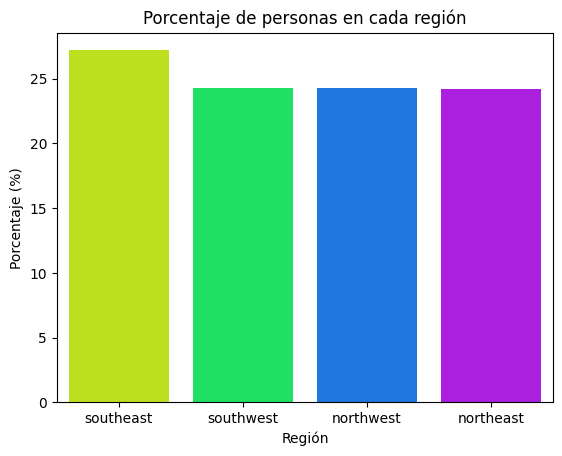

In [ ]:
#Realice un histograma que cuantifique el porcentaje de personas en el conjunto de datos que viven en las distintas regiones.
conteo_regiones = datos['region'].value_counts() #identificar la frecuencia de personas por región

# Calcular el porcentaje de personas en cada región
porcentaje_regiones = conteo_regiones / len(datos) * 100

# Crear un histograma
sns.barplot(x=porcentaje_regiones.index, y=porcentaje_regiones.values, palette='hsv')
plt.title('Porcentaje de personas en cada región')
plt.xlabel('Región')
plt.ylabel('Porcentaje (%)')
plt.show()

Referente al porcentaje de individuos por región se puede decir que existe una pequeña diferencia en las personas muestreadas en la zona southeast comparadas con las de las otras regiones

In [ ]:
print(conteo_regiones)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


## 3. Preprocesamiento de datos

1. Determine si hay datos faltantes o no. De ser así realice las imputaciones que se requieran
2. Realice un OneHotEncoding para las viariables categóricas
3. Realice la separación de datos de entrenamiento y de prueba
4. Haga un escalamiento de variables mediante estandarización (z-score)

In [ ]:
# 1) identificar datos faltantes
datos.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# 2)Realice un OneHotEncoding para las viariables categóricas
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X=datos.iloc[:,:-1].values
y=datos.iloc[:,-1].values

ct=ColumnTransformer(transformers=[('encorder',OneHotEncoder(),[1,4,5])], remainder= 'passthrough') #transforma los datos de la columna de la posición 1,4,5 la cual es de tipo categorico
# mantiene el resto de las columnas sin cambios (usando remainder='passthrough').
X= ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 19, 27.9, 0],
       [0.0, 1.0, 1.0, ..., 18, 33.77, 1],
       [0.0, 1.0, 1.0, ..., 28, 33.0, 3],
       ...,
       [1.0, 0.0, 1.0, ..., 18, 36.85, 0],
       [1.0, 0.0, 1.0, ..., 21, 25.8, 0],
       [1.0, 0.0, 0.0, ..., 61, 29.07, 0]], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
# 4) Haga un escalamiento de variables mediante estandarización (z-score)
from sklearn.preprocessing import StandardScaler #escalonamiento
sc_x=StandardScaler()
# Estandarizar los datos para Y
sc_y = StandardScaler()  # Crear una instancia única de StandardScaler para y
X_train_Sc=sc_x.fit_transform(X_train) #estandarizar datos de entrenamiento
X_test_Sc=sc_x.transform(X_test)
#Estandarizar los datos para Y
y_train_Sc = sc_y.fit_transform(y_train.reshape(len(y_train),1))
y_test_Sc = sc_y.transform(y_test.reshape(len(y_test),1))

## 4. Entrenamiento de Modelo

1. Entrene un modelo de regresión lineal múltiple y un SVR y decida cuál de los modelos es mejor basado en alguna métrica de "goodness of fit". Muestre el scatter plot de los valores predichos vs valores de prueba para ver qué tan bien se ajusta cada modelo

2. Cuál es el valor del seguro para un cliente con las siguientes características.
    * Edad: 25
    * BMI: 32
    * Hijos: 2
    * Fumador: No
    * Género: Femenino
    * Region: northwest

In [ ]:
# 1) Entrene un modelo de regresión lineal múltiple y un SVR y decida cuál de los modelos es mejor basado en alguna métrica de "goodness of fit".
#     Muestre el scatter plot de los valores predichos vs valores de prueba para ver qué tan bien se ajusta cada modelo
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
lr=LinearRegression()
lr.fit(X_train_Sc,y_train)

LinearRegression()

Métricas para Regresión Lineal Múltiple:
Mean Squared Error: 33629723.16334896
R-squared: 0.7833816557455674


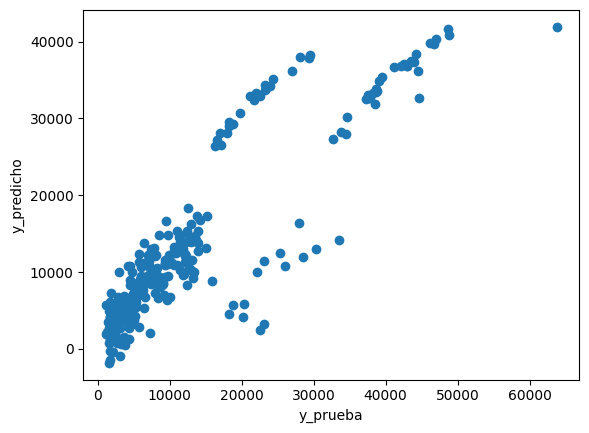

In [ ]:
#Predicción
y_pred_regression = lr.predict(X_test_Sc)
plt.figure()
plt.scatter(y_test,y_pred_regression)
plt.plot()
plt.xlabel("y_prueba")
plt.ylabel("y_predicho")

# Predecir en el conjunto de prueba y calcular métricas
mse_regression = mean_squared_error(y_test, y_pred_regression)
r2_regression = r2_score(y_test, y_pred_regression)

print("Métricas para Regresión Lineal Múltiple:")
print("Mean Squared Error:", mse_regression)
print("R-squared:", r2_regression)



Métricas para Support Vector Regression (SVR):
Mean Squared Error: 0.1479738652411806
R-squared: 0.8624297685624642


Text(0, 0.5, 'Valores Predichos')

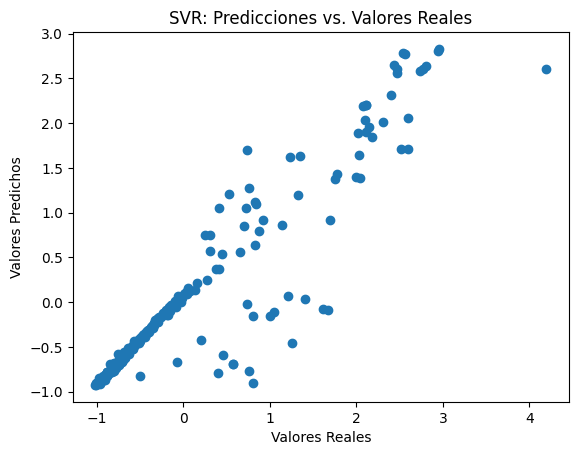

In [ ]:
#Entrenar el modelo de SVR
svr_model = SVR()
svr_model.fit(X_train_Sc, y_train_Sc.reshape(len(y_train_Sc)))
# Predecir en el conjunto de prueba y calcular métricas
y_pred_svr = svr_model.predict(X_test_Sc)
mse_svr = mean_squared_error(y_test_Sc, y_pred_svr)
r2_svr = r2_score(y_test_Sc, y_pred_svr)

print("\nMétricas para Support Vector Regression (SVR):")
print("Mean Squared Error:", mse_svr)
print("R-squared:", r2_svr)
# Scatter plot para SVR
#lt.subplot(1, 2, 2)
plt.scatter(y_test_Sc, y_pred_svr)
plt.title('SVR: Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')


In [ ]:
# 2) Cuál es el valor del seguro para un cliente dadas las características.
nuevo_Dato = [[25,'female',32,2,'no','northwest']]
nuevo_Dato=ct.transform(nuevo_Dato)
nuevo_Dato=sc_x.transform(nuevo_Dato) #estandarizar el nuevo dato
pred_nuevodato = lr.predict(nuevo_Dato)
print("Predicción del seguro usando Regresión Lineal Múltiple:", pred_nuevodato)

Predicción del seguro usando Regresión Lineal Múltiple: [5291.35671873]


# Ejercicio 2:

El siguiente conjunto de datos tiene como objetivo determinar el tipo de medicamento que se debe formular a un paciente basado en los siguientes atributos

1. Edad
2. Género
3. Nivel de presión en sangre (BP)
4. Nivel de Colesterol
5. Proporción Sodio/Potasio en sangre
    
La última columna corresponde al tipo de medicamento que ha sido formulado para cada paciente dentro de los registros.    

In [ ]:
datos1=pd.read_csv('drug200.csv')
datos1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## 1. Estadística descriptiva de los datos

Responda las siguientes preguntas

1. Cuántos datos hay en el conjunto de datos
2. Cuál es el promedio de edad en los datos
3. Cuál es la desviación estándar de la proporcion Na/K

In [ ]:
# 1) número de datos en el conjunto de datos
datos1.shape

(200, 6)

In [ ]:
# 2) Cuál es el promedio de edad en los datos
promedio_edad = datos1["Age"].mean()
print(f" El promedio del valor de la edad es: {promedio_edad}")

 El promedio del valor de la edad es: 44.315


In [ ]:
#c 3) Cuál es la desviación estándar de la proporcion Na/K
std_Na=datos1["Na_to_K"].std()
print(f"La desviación estándar de la Proporción Sodio/Potasio en sangre: {std_Na}")

La desviación estándar de la Proporción Sodio/Potasio en sangre: 7.223955528459516


# 2. Inspección gráfica

Usando los métodos estudiados responda:

1. Calcule y grafique la matriz de correlación entre las variables numéricas.
2. Haga un pairplot condicionado a: tipo de droga prescrita, Género, BP y Colesterol. Se puede deducir algo de este análisis?
3. Realice los histogramas de las variables categóricas que no pueden ser visualizadas en el pairplot

La matriz de correlación es:               Age   Na_to_K
Age      1.000000 -0.063119
Na_to_K -0.063119  1.000000


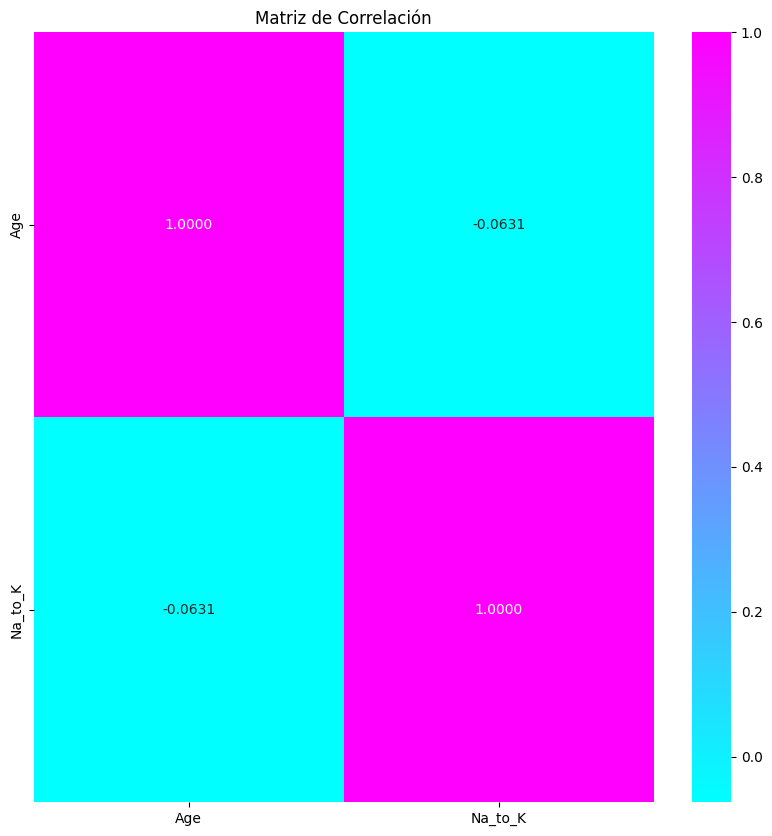

In [ ]:
# 1) Calcule y grafique la matriz de correlación entre las variables numéricas
import seaborn as sns
#creando un nuevo data frame con las variables  númericas
datosnum1=pd.DataFrame(datos1, columns = ['Age',	'Na_to_K'])
correlacion=datosnum1.corr()
print(f'La matriz de correlación es: {correlacion}')
# Viualizar la matriz de correlación con Seaborn
f, eje_donde_deseo_graficar = plt.subplots(figsize=(10, 10))
sns.heatmap(datosnum1.corr(), annot=True, linecolor="black", fmt='.4f', ax=eje_donde_deseo_graficar, cmap="cool")
plt.title("Matriz de Correlación")
plt.show()


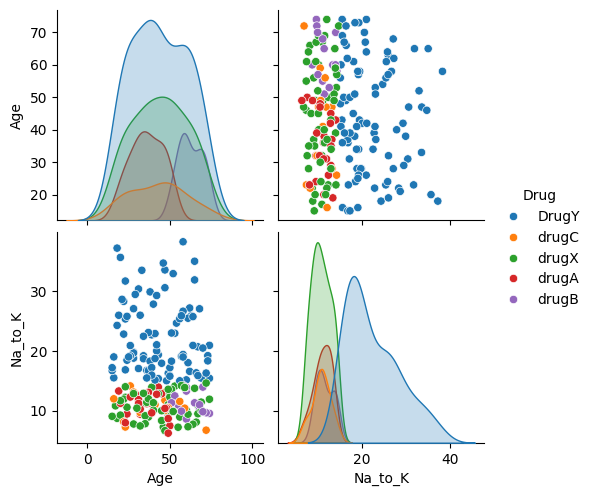

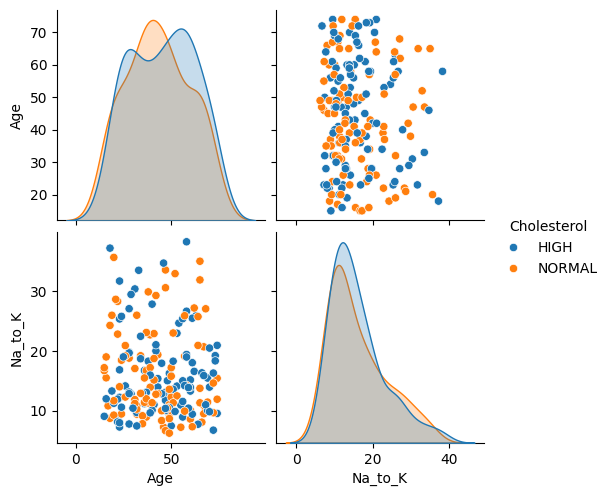

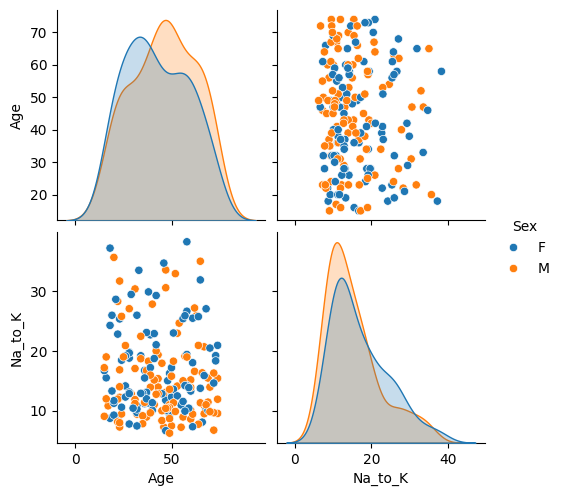

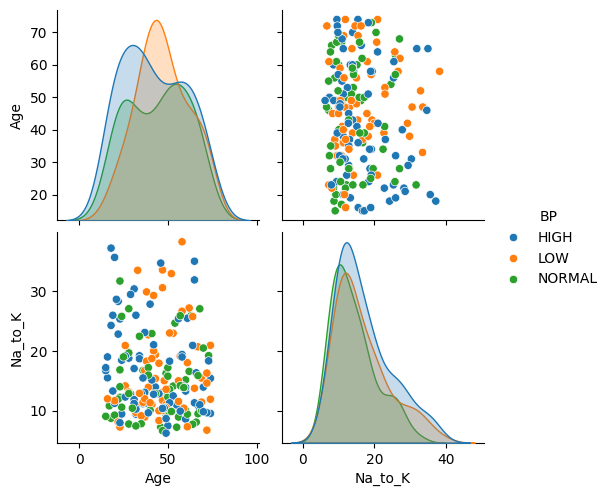

In [ ]:
# 2) Haga un pairplot condicionado a: tipo de droga prescrita, Género, BP y Colesterol. Se puede deducir algo de este análisis?}
df = pd.DataFrame(datos1)
sns.pairplot(df, hue="Drug")
sns.pairplot(df, hue='Cholesterol')
sns.pairplot(df, hue="Sex")
sns.pairplot(df, hue='BP')
# Mostrar el gráfico
plt.show()

Con base a los pairplots establecidos previamente podemos concluir lo siguiente:

*   A las personas que se les ha suministrado el medicamento 'Y' (DrugY) son aquellas que presentan mayor proporción de potasio/sodio en la sangre y a su vez las de mayor edad.

*  
No se evidencia una relación clara entre la edad de las personas y la proporción de potasio/sodio en la sangre en relación con los niveles de colesterol, ya sea alto o normal.

*   Aunque no se observa una relación definida, es posible señalar que hay un número ligeramente mayor de mujeres de edad avanzada con una proporción de potasio/sodio en la sangre superior en comparación con los hombres. Cabe destacar que la discrepancia no es considerable.
*  No se evidencia una relación o patrón claro de el nivel de presion en la sengre con respecto a la edad de las personas y proporción de potasio/sodio en la sangre



<ipython-input-26-2db749ce94f2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette=sex_palette)


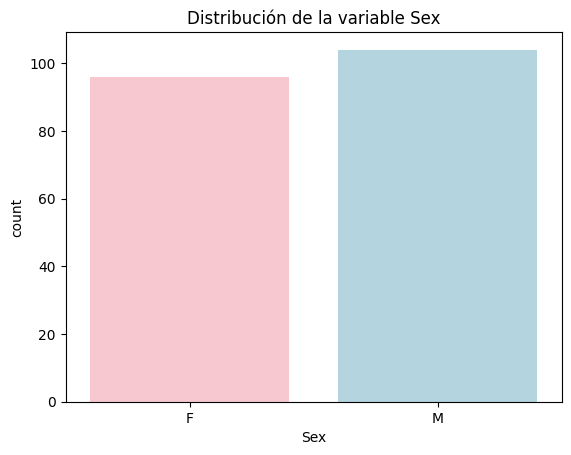

<ipython-input-26-2db749ce94f2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BP', data=df, palette=bp_palette)


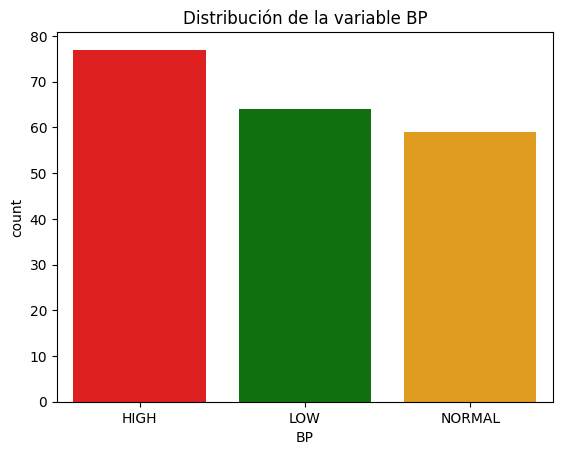

<ipython-input-26-2db749ce94f2>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cholesterol', data=df, palette=cholesterol_palette)


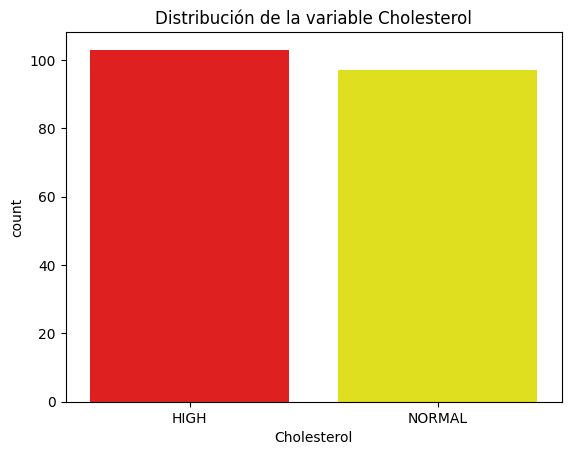

<ipython-input-26-2db749ce94f2>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug', data=df, palette=drug_palette)


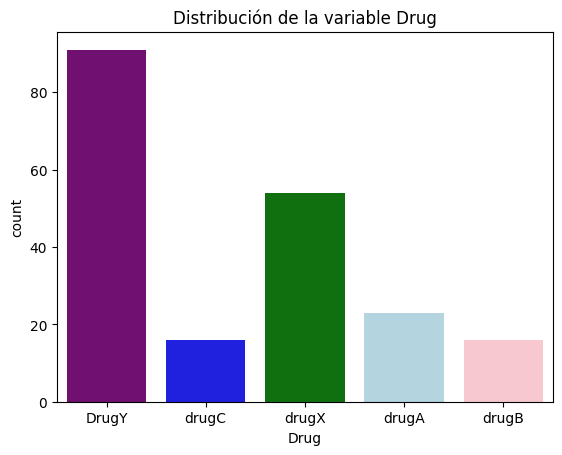

In [ ]:
# 3) Realice los histogramas de las variables categóricas que no pueden ser visualizadas en el pairplot
# Definir paletas de colores
sex_palette = {'F': 'pink', 'M': 'lightblue'}
bp_palette = {'LOW': 'green', 'NORMAL': 'orange', 'HIGH': 'red'}
cholesterol_palette = {'NORMAL': 'yellow', 'HIGH': 'red'}
drug_palette = {'DrugY': 'purple', 'drugC': 'blue', 'drugX': 'green', 'drugA':'lightblue', 'drugB': 'pink' }

# Histograma de la variable categórica 'Sex'
sns.countplot(x='Sex', data=df, palette=sex_palette)
plt.title('Distribución de la variable Sex')
plt.show()

# Histograma de la variable categórica 'BP'
sns.countplot(x='BP', data=df, palette=bp_palette)
plt.title('Distribución de la variable BP')
plt.show()

# Histograma de la variable categórica 'Cholesterol'
sns.countplot(x='Cholesterol', data=df, palette=cholesterol_palette)
plt.title('Distribución de la variable Cholesterol')
plt.show()

# Histograma de la variable categórica 'Drug'
sns.countplot(x='Drug', data=df, palette=drug_palette)
plt.title('Distribución de la variable Drug')
plt.show()

## 3. Preprocesamiento de datos

1. Determine si hay datos faltantes o no. De ser así realice las imputaciones que se requieran
2. Realice un OneHotEncoding para las viariables categóricas
3. Realice la separación de datos de entrenamiento y de prueba
4. Haga un escalamiento de variables mediante estandarización (z-score)

In [ ]:
# 1) Determine si hay datos faltantes o no. De ser así realice las imputaciones que se requieran
datos1.isna().sum() #identificar datos faltantes

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:

# 2)Realice un OneHotEncoding para las viariables categóricas
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X1=datos1.iloc[:,:-1].values
y1=datos1.iloc[:,-1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[1,2,3])],remainder="passthrough")
X1=ct.fit_transform(X1)

In [ ]:
from sklearn.model_selection import train_test_split
train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.2, random_state=42)

In [ ]:
# 4) Haga un escalamiento de variables mediante estandarización (z-score)
from sklearn.preprocessing import StandardScaler #escalonamiento
sc=StandardScaler()
X1_train_Sc=sc.fit_transform(X1_train) #estandarizar datos de entrenamiento
X1_test_Sc=sc.transform(X1_test)

## 4. Entrenamiento de Modelo

1. Entrene un método de clasificación KNN y un SVC con Kernel de tipo 'sigmoid' y decida cuál de los modelos es mejor basado en una métrica de accuracy. Adcionalmente interprete la matriz de confusión resultante

2. Cuál es la medicina que se debería recetar a un paciente con las siguientes características.
    * Edad: 25
    * BP: HIGH
    * Genero: 'Male'
    * Cholesterol: 'NORMAL'
    * Na_to_K: 10.23

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier()
KN.fit(X1_train_Sc,y1_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Realizar predicciones en el conjunto de prueba
y1_pred_knn = KN.predict(X1_test_Sc)
# Calcular la precisión del clasificador KNN
accuracy_knn = accuracy_score(y1_test, y1_pred_knn)
print("Accuracy del clasificador KNN:", accuracy_knn)
# Imprimir la matriz de confusión para el clasificador KNN
conf_matrix_knn = confusion_matrix(y1_test, y1_pred_knn)
conf_matrix_df_knn = pd.DataFrame(conf_matrix_knn, index=KN.classes_, columns=KN.classes_)
print("\nMatriz de Confusión para KNN:")
print(conf_matrix_df_knn)


Accuracy del clasificador KNN: 0.9

Matriz de Confusión para KNN:
       DrugY  drugA  drugB  drugC  drugX
DrugY     12      1      0      0      2
drugA      0      6      0      0      0
drugB      0      0      3      0      0
drugC      1      0      0      4      0
drugX      0      0      0      0     11


In [ ]:
from sklearn.svm import SVC
# Inicializar y entrenar el clasificador SVC con kernel sigmoidal con datos estandarizados
svc_classifier = SVC(kernel='sigmoid', random_state=42)
svc_classifier.fit(X1_train_Sc, y1_train)

# Realizar predicciones en el conjunto de prueba
y1_pred_svc = svc_classifier.predict(X1_test_Sc)

# Calcular la precisión del clasificador SVC
accuracy_svc = accuracy_score(y1_test, y1_pred_svc)
print("\nAccuracy del clasificador SVC:", accuracy_svc)

# Imprimir la matriz de confusión para el clasificador SVC
conf_matrix_svc = confusion_matrix(y1_test, y1_pred_svc)
conf_matrix_df_svc = pd.DataFrame(conf_matrix_svc, index=svc_classifier.classes_, columns=svc_classifier.classes_)
print("\nMatriz de Confusión para SVC:")
print(conf_matrix_df_svc)


Accuracy del clasificador SVC: 0.9

Matriz de Confusión para SVC:
       DrugY  drugA  drugB  drugC  drugX
DrugY     15      0      0      0      0
drugA      3      3      0      0      0
drugB      1      0      2      0      0
drugC      0      0      0      5      0
drugX      0      0      0      0     11


In [ ]:
# 2) Cuál es el valor del seguro para un cliente dadas las características.
nuevo_Dato1 = [[25,"M","HIGH","NORMAL",10.23]]
nuevo_Dato1=ct.transform(nuevo_Dato1)
nuevo_Dato1=sc.transform(nuevo_Dato1) #estandarizar el nuevo dato
pred_nuevodato1 = KN.predict(nuevo_Dato1)
print("Predicción de la medicina que se debería recetar a un paciente usando KNN:", pred_nuevodato1)

Predicción de la medicina que se debería recetar a un paciente usando KNN: ['drugA']
